# **라이브러리 불러오기**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import os
# os.chdir('../open')

In [3]:
train=pd.read_csv('./open/train.csv')
test=pd.read_csv('./open/test.csv')
submission=pd.read_csv('./open/sample_submission.csv')

# **[데이터 살펴보기]**

In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [6]:
train.shape

(26457, 20)

In [7]:
test.shape

(10000, 19)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

In [9]:
data=pd.concat([train, test], axis=0)
data.shape

(36457, 20)

## **1. 결측치 제거** 

In [10]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [11]:
data=data.drop('occyp_type', axis=1)

In [12]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

## **2. Binary variables**

In [13]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])
print('gender :')
print(data['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
data['car'] = data['car'].replace(['N','Y'],[0,1])
print(data['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
data['reality'] = data['reality'].replace(['N','Y'],[0,1])
print(data['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(data['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(data['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(data['work_phone'].value_counts())
print('--------------')

gender :
0    24430
1    12027
Name: gender, dtype: int64
--------------
Having a car or not : 
0    22614
1    13843
Name: car, dtype: int64
--------------
Having house reality or not: 
1    24506
0    11951
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    25709
1    10748
Name: phone, dtype: int64
--------------
Having a email or not: 
0    33186
1     3271
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    28235
1     8222
Name: work_phone, dtype: int64
--------------


## **3. Continuous variable**

### (1) child_num

<AxesSubplot:>

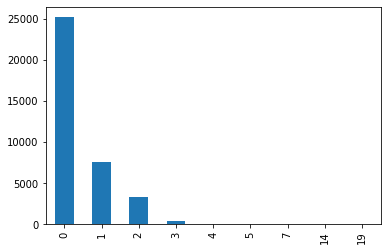

In [14]:
data['child_num'].value_counts(sort=False).plot.bar()

In [15]:
data.loc[data['child_num'] >= 3,'child_num']=3

### (2) inc

(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

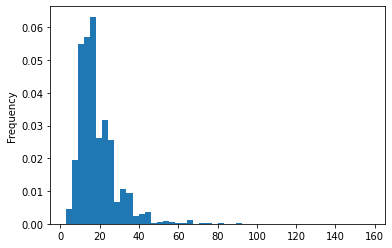

In [16]:
data['income_total'] = data['income_total'].astype(object)
data['income_total'] = data['income_total']/10000 
print(data['income_total'].value_counts(bins=10,sort=False))
data['income_total'].plot(kind='hist',bins=50,density=True)

In [17]:
count, bin_dividers =np.histogram(data['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
data['income_total']=pd.cut(x=data['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

### **(3) Type**

In [18]:
print(data['income_type'].unique())
print(data['edu_type'].unique())
print(data['family_type'].unique())
print(data['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [19]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['income_type']=label_encoder.fit_transform(data['income_type'])
data['edu_type']=label_encoder.fit_transform(data['edu_type'])
data['family_type']=label_encoder.fit_transform(data['family_type'])
data['house_type']=label_encoder.fit_transform(data['house_type'])
data['income_total']=label_encoder.fit_transform(data['income_total'])

## **4. Minus continuous variable**

In [20]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    data[variable]=-data[variable]
    count, bin_dividers =np.histogram(data[variable], bins=n)
    bin_names=[str(i) for i in range(n)]
    data[variable]=pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    data[variable]=label_encoder.fit_transform(data[variable])

In [21]:
data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [22]:
make_bin('DAYS_BIRTH', n=10)
#make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [23]:
print(data['DAYS_EMPLOYED'][0])

0     -4709
0    365243
Name: DAYS_EMPLOYED, dtype: int64


In [24]:
data.loc[data['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED']=0
data.loc[data['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED']=1

In [25]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,3,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,2,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,6,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,4,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,4,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,6,0,1,1,1,0,2.0,1,NaN
9996,36453,1,1,1,0,0,4,4,0,1,1,0,1,1,0,0,2.0,2,NaN
9997,36454,0,0,1,0,1,4,4,1,1,7,0,1,0,0,0,2.0,3,NaN
9998,36455,0,1,0,0,0,0,4,1,1,5,0,1,0,1,0,2.0,2,NaN


# **[데이터 모델링]**

In [26]:
len(data)

36457

In [27]:
train=data[:len(data)-10000]
test=data[len(data)-10000:]

In [28]:
train.shape

(26457, 19)

In [29]:
test.shape

(10000, 19)

In [30]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test.drop('credit', axis=1)

In [31]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 18) (26457, 1) (10000, 18)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.2,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(21165, 18)
(21165, 1)
Validation set: 
(5292, 18)
(5292, 1)
log_loss: 0.8576702132843363


In [33]:
# import BayesianOptimization as bysian_opt
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [34]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_val)

In [35]:
def xgb_evaluate(max_depth, gamma,min_child_weight,max_delta_step,subsample,colsample_bytree,learning_rate):
    params = {'eval_metric': 'mlogloss',
              'objective': 'multi:softprob',
              'num_class' : 61,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': learning_rate,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,   
              'min_child_weight': min_child_weight ,
              'max_delta_step':max_delta_step
             }
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=200, nfold=5)    

    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-mlogloss-mean'].iloc[-1]

In [36]:
xgb_bo = BayesianOptimization(xgb_evaluate, {
                                    'max_depth': (2, 12),
                                     'gamma': (0.001, 10.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree' :(0.4, 1.0),
                                     'learning_rate': (0.01,0.2)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.8844   |  0.7608   |  2.302    |  0.1362   |  4.016    |  8.686    |  15.31    |  0.7019   |
|  2        | -0.8845   |  0.6831   |  2.425    |  0.1716   |  9.036    |  5.782    |  11.46    |  0.4971   |
|  3        | -1.067    |  0.6798   |  6.901    |  0.04788  |  0.2652   |  9.827    |  10.93    |  0.8118   |
|  4        | -0.8821   |  0.6221   |  1.998    |  0.1511   |  4.191    |  8.672    |  16.17    |  0.7259   |
|  5        | -0.911    |  1.0      |  0.001    |  0.124    |  7.195    |  7.544    |  14.51    |  0.4      |
|  6        | -0.8761   |  0.4      |  4.899    |  0.2      |  7.977    |  5.033    |  15.85    |  1.0      |
|  7        | -0.8777   |  0.4      |  5.115    |  0.2      |  10.0     |  2.0      |  12.83    |  1.0      |
|  8      

In [37]:
params = xgb_bo.max['params']

In [38]:
params

{'colsample_bytree': 0.4,
 'gamma': 4.89879886698583,
 'learning_rate': 0.2,
 'max_delta_step': 7.97746569951542,
 'max_depth': 5.0332034145562545,
 'min_child_weight': 15.847598744876818,
 'subsample': 1.0}

In [39]:
params['max_depth'] = 4
params['eval_metric'] = 'mlogloss'
params['objective'] = 'multi:softprob'
params['num_class'] = 3
params['learning_rate'] = 0.2
params

{'colsample_bytree': 0.4,
 'gamma': 4.89879886698583,
 'learning_rate': 0.2,
 'max_delta_step': 7.97746569951542,
 'max_depth': 4,
 'min_child_weight': 15.847598744876818,
 'subsample': 1.0,
 'eval_metric': 'mlogloss',
 'objective': 'multi:softprob',
 'num_class': 3}

In [40]:
model = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=250,
    nfold=5,
    early_stopping_rounds=50,
    verbose_eval = 50
)

In [61]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        
#         dtrain = xgb.DMatrix(X_train, y_train)
#         dtest = xgb.DMatrix(X_val)
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        #final_gb = xgb.train(params, dtrain, num_boost_round=200, verbose_eval=50)

        #predictions = final_gb.predict(dtest)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.8554977595370191
FOLD 1 : logloss:0.8543368930291905
FOLD 2 : logloss:0.8537899052512412
FOLD 3 : logloss:0.855069689654979
FOLD 4 : logloss:0.8517191917311572
Mean:0.8540826878407174


In [62]:
my_submission

array([[0.02175127, 0.14117106, 0.83707767],
       [0.03752634, 0.19294485, 0.7695288 ],
       [0.05209617, 0.21123066, 0.73667318],
       ...,
       [0.04236861, 0.15225527, 0.80537612],
       [0.09416811, 0.23026653, 0.67556536],
       [0.02300507, 0.39377609, 0.58321885]])

In [63]:
submission

,index,0,1,2
0,26457,0.021751,0.141171,0.837078
1,26458,0.037526,0.192945,0.769529
2,26459,0.052096,0.211231,0.736673
3,26460,0.085383,0.144742,0.769875
4,26461,0.052356,0.422365,0.525279
...,...,...,...,...
9995,36452,0.040977,0.282346,0.676677
9996,36453,0.021213,0.340789,0.637997
9997,36454,0.042369,0.152255,0.805376
9998,36455,0.094168,0.230267,0.675565


In [64]:
submission.loc[:,1:]=my_submission

In [65]:
submission

,index,0,1,2
0,26457,0.021751,0.141171,0.837078
1,26458,0.037526,0.192945,0.769529
2,26459,0.052096,0.211231,0.736673
3,26460,0.085383,0.144742,0.769875
4,26461,0.052356,0.422365,0.525279
...,...,...,...,...
9995,36452,0.040977,0.282346,0.676677
9996,36453,0.021213,0.340789,0.637997
9997,36454,0.042369,0.152255,0.805376
9998,36455,0.094168,0.230267,0.675565


In [66]:
submission.to_csv('./lgb_baseline_submission.csv', index=False)